<a href="https://colab.research.google.com/github/cvillarr123/marketingKPI/blob/main/CLASIFICACION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#0.- Librerias 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from google.colab import drive
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())
drive.mount('/content/drive')



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWiPJd5qDQ6gzVMWbndkmdoYNSMh9pHp338ZxU9eXeLmngGIHPoStTs


ValueError: ignored

In [17]:
import json

In [4]:
#path='/content/drive/My Drive/PROYECTO DATA SCIENCE/Data/DATA DRIVE.xlsx'
#data = pd.read_excel(path,sheet_name='EDAD Y GENERO')

path='DATA DRIVE.xlsx'
data = pd.read_excel(path,sheet_name='EDAD Y GENERO')


** Funciones para graficar en el dash**

In [5]:
# graficar dos tipos de grafico de barras de las categorias
# pasas la columna de las categorias en eje x
def graficar_categorias_vs_objetivo(data, x_col, y_col, tipo_grafico) :
  import plotly.express as px
  if (len(tipo_grafico) >= 1 and tipo_grafico[0] == 1)  :
    fig2 = px.histogram(data, x=x_col, y=y_col, histfunc='sum', height=300,
                        title='Histograma')
    fig2.show()
  if (len(tipo_grafico) >= 2 and tipo_grafico[0] == 1)  :  
    fig1 = px.bar(data, x=x_col, y=y_col, height=300,
                  title='Grafico barras apiladas - Hover on individual items')
    fig1.show()

In [6]:
def dibujar_box_plot(datos, x_col, y_col, orientacion) :
     sns.boxplot(y= datos[x_col] , x= datos[y_col], orient=orientacion)

# ejemplo 
# dibujar_box_plot(data, 'Costperon-Facebooklead', 'Clasificacion', 'v')     

In [29]:
def graficar_countplot ( datos, x_col, y_col, paleta ) :
  chart = sns.countplot(x=x_col, data=datos, palette=paleta)
  chart.set_xticklabels(chart.get_xticklabels(), fontsize=7)
  chart.set(xlabel=x_col, ylabel=y_col)
  plt.show()

# 0.- Transformacion y limpieza

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3031 entries, 0 to 3030
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             3031 non-null   int64  
 1   Year & month                     3031 non-null   object 
 2   Campaign ID                      3031 non-null   int64  
 3   Campaign name                    3031 non-null   object 
 4   Campaign objective               3031 non-null   object 
 5   Ad set ID                        3031 non-null   int64  
 6   Ad set name                      3031 non-null   object 
 7   Ad ID                            3031 non-null   int64  
 8   Ad name                          3031 non-null   object 
 9   Promoted post type               3031 non-null   object 
 10  Promoted post created date       3031 non-null   int64  
 11  Promoted post description        2622 non-null   object 
 12  Promoted post messag

Eliminar NA

In [9]:
filter1 = data.Year == 2021  
filter2 = data.Age != 'unknown'
filter3 = data.Gender != 'unknown'
filter4 = data["Campaign objective"] == "LEAD_GENERATION"

##filter3 = df_inicial.Month.isin([4,5,6,7])  
data = data[  filter1 & filter2 & filter3 & filter4 ]
data.head(5)

,Year,Year & month,Campaign ID,Campaign name,Campaign objective,Ad set ID,Ad set name,Ad ID,Ad name,Promoted post type,Promoted post created date,Promoted post description,Promoted post message,Promoted post caption,Ad set start time,Ad set end time,Ad set targeting,Targeting minimum age,Targeting maximum age,Age,Gender,Cost,Impressions,Reach,Frequency,Link clicks,Unique leads,CPM (cost per 1000 impressions),Cost per on-Facebook lead
0,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,18-24,female,0.00,4,4,1.00,0,0,0.00,NaN
1,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,18-24,male,0.10,69,56,1.23,0,0,1.45,NaN
2,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,female,0.19,18,18,1.00,0,0,10.56,NaN
3,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,0.32,226,193,1.17,3,1,1.42,0.32
4,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,35-44,female,0.04,17,13,1.31,0,0,2.35,NaN


In [10]:
data=data.dropna(subset = ["Cost per on-Facebook lead"])
data=data.dropna(subset = ["Promoted post description"])

In [11]:
missing_values_count = data.isnull().sum()
missing_values_count[0:43]

Year                                 0
Year & month                         0
Campaign ID                          0
Campaign name                        0
Campaign objective                   0
Ad set ID                            0
Ad set name                          0
Ad ID                                0
Ad name                              0
Promoted post type                   0
Promoted post created date           0
Promoted post description            0
Promoted post message                0
Promoted post caption                0
Ad set start time                    0
Ad set end time                    472
Ad set targeting                     0
Targeting minimum age                0
Targeting maximum age                0
Age                                  0
Gender                               0
Cost                                 0
Impressions                          0
Reach                                0
Frequency                            0
Link clicks              

Etiquetado Manual 

In [24]:
data =data.dropna(subset=["Cost per on-Facebook lead"])
q1= np.percentile(data["Cost per on-Facebook lead"], 25)  
q2= np.percentile(data["Cost per on-Facebook lead"], 50)
q3= np.percentile(data["Cost per on-Facebook lead"], 75) 

data['Clasificacion'] = "Ninguno"
data['ClasificacionDes'] = 'Ninguno'
data['Clasificacion'].loc[(data['Cost per on-Facebook lead']<= q1)] = 2  #"Mejores"
data['Clasificacion'].loc[(data['Cost per on-Facebook lead']> q1 ) & (data['Cost per on-Facebook lead'] <= q3)] = 1 # "Regulares"
data['Clasificacion'].loc[(data['Cost per on-Facebook lead']> q3 )] = 0 #"Peores"
data['ClasificacionDes'].loc[(data['Cost per on-Facebook lead']<= q1)] = "Mejores"
data['ClasificacionDes'].loc[(data['Cost per on-Facebook lead']> q1 ) & (data['Cost per on-Facebook lead'] <= q3)] = "Regulares"
data['ClasificacionDes'].loc[(data['Cost per on-Facebook lead']> q3 )] = "Peores"

data['Clasificacion']= data['Clasificacion'].astype('int')


**Caracteristicas o variables predictorass calculados**

In [13]:
data['Descripcion'] = data['Promoted post description'] 
data['Message'] = data['Promoted post message'] 
data['Caption'] = data['Promoted post caption'] 
data['NumDescripcion'] = data.Descripcion.str.split().str.len()
data['NumMessage'] = data.Message.str.split().str.len()
data['NumCaption'] = data.Caption.str.split().str.len()

In [14]:
data['Rate'] = data['Unique leads']/data['Reach'] 
data['CTR'] = data['Link clicks']/data['Impressions'] 

**Creacion de variables categoricas del campo intereses y nivel educacion**

In [18]:
import warnings
warnings.filterwarnings('ignore')

data['intereses'] = 'NO' 
data['education_statuses'] = 'NO'

data['ComprasOnline'] = 'NO'
data['Seguridad'] = 'NO'
data['SeguridadAlarmas'] = 'NO'
data['DispositivoInteligente'] = 'NO'
data['DispositivosGPS'] = 'NO'
data['SmartTechnologies'] = 'NO'
data['TarjetasCredito'] = 'NO'
data['Transporte'] = 'NO'
ComprasOnline = ['Compras online']
Seguridad = ['Seguridad', 'Security', 'Sistema de alarma']
SeguridadAlarmas = ['Anti-theft system', 'Security alarm', 'Sistema de alarma']
DispositivoInteligente = ['Dispositivo inteligente']
DispositivosGPS = ['Dispositivos GPS','GPS Asistido','Conducción','Google Maps','Vehicle tracking system']
SmartTechnologies = ['Smart Technologies']
TarjetasCredito = ['Tarjetas de crédito']
Transporte = ['Transporte']
education_statuses = ['10']

for i in data.index:

  #if (i == 778):
    campo_json = json.loads(data.loc[i]['Ad set targeting'])
    #hay registros que no tienen en el json el flexible_spec
    try:
        lista_intereses = pd.get_dummies(pd.json_normalize( campo_json ,record_path=['flexible_spec','interests'],errors='ignore').rename(columns={'name': 'interes'})['interes']).columns.values.tolist()
        #lista_educacion = pd.json_normalize(cuack_json,record_path=['flexible_spec'],errors='ignore')['education_statuses'][0]
        cadena_interes = '| ' + ''.join([  str( item + ' | ') for item in lista_intereses ])
        #cadena_educacion = '| ' + ''.join([  str( str(item) + ' | ') for item in lista_educacion ])
        data['intereses'][data.index == i] = cadena_interes

        if any(x in cadena_interes  for x in ComprasOnline) :
             data['ComprasOnline'][data.index == i] = 'SI'
        else :
             data['ComprasOnline'][data.index == i] = 'NO'

        if any(x in cadena_interes for x in Seguridad ) :
             data['Seguridad'][data.index == i] = 'SI'
        else :
             data['Seguridad'][data.index == i] = 'NO'

        if any(x in cadena_interes  for x in SeguridadAlarmas) :
             data['SeguridadAlarmas'][data.index == i] = 'SI'
        else :
             data['SeguridadAlarmas'][data.index == i] = 'NO'

        if any(x in cadena_interes  for x in DispositivoInteligente ) :
             data['DispositivoInteligente'][data.index == i] = 'SI'
        else :
             data['DispositivoInteligente'][data.index == i] = 'NO'

        if any(x in cadena_interes  for x in DispositivosGPS ) :
             data['DispositivosGPS'][data.index == i] = 'SI'
        else :
             data['DispositivosGPS'][data.index == i] = 'NO'

        if any(x in cadena_interes  for x in SmartTechnologies ) :
             data['SmartTechnologies'][data.index == i] = 'SI'
        else :
             data['SmartTechnologies'][data.index == i] = 'NO'

        if any(x in cadena_interes  for x in TarjetasCredito ) :
             data['TarjetasCredito'][data.index == i] = 'SI'
        else :
             data['TarjetasCredito'][data.index == i] = 'NO'

        if any(x in cadena_interes  for x in Transporte ) :
             data['Transporte'][data.index == i] = 'SI'
        else :
             data['Transporte'][data.index == i] = 'NO'

        #if any(x in education_statuses for x in cadena_educacion) :
        #     data['education_statuses'][data.index == i] = 'SI'
        #else :
        #     data['education_statuses'][data.index == i] = 'NO'


    except:
        data.loc[i]['intereses'] = 'NO' 
        #data.loc[i]['education_statuses'] = 'NO' 
        data.loc[i]['ComprasOnline'] = 'NO'
        data.loc[i]['Seguridad'] = 'NO'
        data.loc[i]['SeguridadAlarmas'] = 'NO'
        data.loc[i]['DispositivoInteligente'] = 'NO'
        data.loc[i]['DispositivosGPS'] = 'NO'
        data.loc[i]['SmartTechnologies'] = 'NO'
        data.loc[i]['TarjetasCredito'] = 'NO'
        data.loc[i]['Transporte'] = 'NO'
        


In [19]:
data.head(2)

,Year,Year & month,Campaign ID,Campaign name,Campaign objective,Ad set ID,Ad set name,Ad ID,Ad name,Promoted post type,Promoted post created date,Promoted post description,Promoted post message,Promoted post caption,Ad set start time,Ad set end time,Ad set targeting,Targeting minimum age,Targeting maximum age,Age,Gender,Cost,Impressions,Reach,Frequency,Link clicks,Unique leads,CPM (cost per 1000 impressions),Cost per on-Facebook lead,Clasificacion,Descripcion,Message,Caption,NumDescripcion,NumMessage,NumCaption,Rate,CTR,intereses,education_statuses,ComprasOnline,Seguridad,SeguridadAlarmas,DispositivoInteligente,DispositivosGPS,SmartTechnologies,TarjetasCredito,Transporte
3,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845909825730753,anuncio_octubre_ubicacion_desde_celular_vr_1,link,44272,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,25-34,male,0.32,226,193,1.17,3,1,1.42,0.32,2,Beneficios CarSync®,Seguridad es poder recibir asistencia vial en ...,Mantén el control en todo momento,2,25,6,0.005181,0.013274,| Anti-theft system | Compras online | Conducc...,NO,SI,SI,SI,SI,SI,SI,SI,SI
13,2021,2021|01,23845909826600753,BASICA_ECUADOR_decisión_drive,LEAD_GENERATION,23845909823750753,intereses_drive - perfil alto,23845985004450753,anuncio_1_drive_halloween,link,44287,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,44118,NaN,"{""age_max"":44,""age_min"":23,""excluded_custom_au...",23,44,18-24,male,4.60,4608,2525,1.82,14,3,1.00,1.53,1,Regístrate aquí,¡No permitas que esto te pase! Por tan solo $ ...,CarSync® promo,2,48,2,0.001188,0.003038,| Anti-theft system | Compras online | Conducc...,NO,SI,SI,SI,SI,SI,SI,SI,SI


# 1.-  AEDA

In [20]:
data.describe()

,Year,Campaign ID,Ad set ID,Ad ID,Promoted post created date,Ad set start time,Ad set end time,Targeting minimum age,Targeting maximum age,Cost,Impressions,Reach,Frequency,Link clicks,Unique leads,CPM (cost per 1000 impressions),Cost per on-Facebook lead,Clasificacion,NumDescripcion,NumMessage,NumCaption,Rate,CTR
count,476.0,4.760000e+02,4.760000e+02,4.760000e+02,476.000000,476.000000,4.0,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,2021.0,2.384593e+16,2.384635e+16,2.384679e+16,44334.901261,44175.512605,44364.0,22.432773,56.138655,14.374370,7330.718487,4224.294118,1.541786,41.088235,5.735294,2.322668,2.383256,1.002101,6.792017,34.491597,5.676471,0.004501,0.009135
std,0.0,1.680774e+11,7.915021e+11,6.676882e+11,33.310228,103.190605,0.0,1.454466,9.925072,25.172324,13626.452709,7092.997162,0.432234,67.071655,9.044294,1.575707,1.769113,0.706359,3.097167,10.284067,2.326134,0.018485,0.015230
min,2021.0,2.384591e+16,2.384591e+16,2.384591e+16,44272.000000,44118.000000,44364.0,18.000000,44.000000,0.020000,4.000000,3.000000,1.000000,1.000000,1.000000,0.750000,0.020000,0.000000,1.000000,1.000000,1.000000,0.000232,0.001137
25%,2021.0,2.384591e+16,2.384591e+16,2.384615e+16,44327.000000,44118.000000,44364.0,21.000000,44.000000,1.867500,807.750000,568.000000,1.230000,5.000000,1.000000,1.530000,1.277500,1.000000,5.000000,30.000000,4.000000,0.000947,0.004347
50%,2021.0,2.384591e+16,2.384591e+16,2.384664e+16,44327.000000,44118.000000,44364.0,23.000000,65.000000,4.920000,2607.500000,1696.500000,1.440000,15.000000,2.000000,1.955000,2.025000,1.000000,7.000000,31.000000,6.000000,0.001529,0.005932
75%,2021.0,2.384591e+16,2.384603e+16,2.384748e+16,44362.000000,44138.000000,44364.0,23.000000,65.000000,15.382500,8261.750000,5047.500000,1.712500,44.000000,6.000000,2.732500,3.100000,1.250000,7.000000,40.000000,7.000000,0.003013,0.009790
max,2021.0,2.384775e+16,2.384805e+16,2.384808e+16,44399.000000,44396.000000,44364.0,25.000000,65.000000,214.980000,147944.000000,67398.000000,3.900000,516.000000,68.000000,27.500000,11.390000,2.000000,12.000000,56.000000,9.000000,0.333333,0.250000


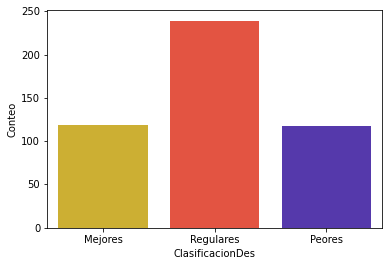

In [26]:
#sns.countplot(x="Clasificacion", data=data, palette="bwr")
#plt.show()

graficar_countplot(data,'ClasificacionDes','Conteo','CMRmap_r')

In [32]:
pd.unique(data['Promoted post type'])

array(['link'], dtype=object)

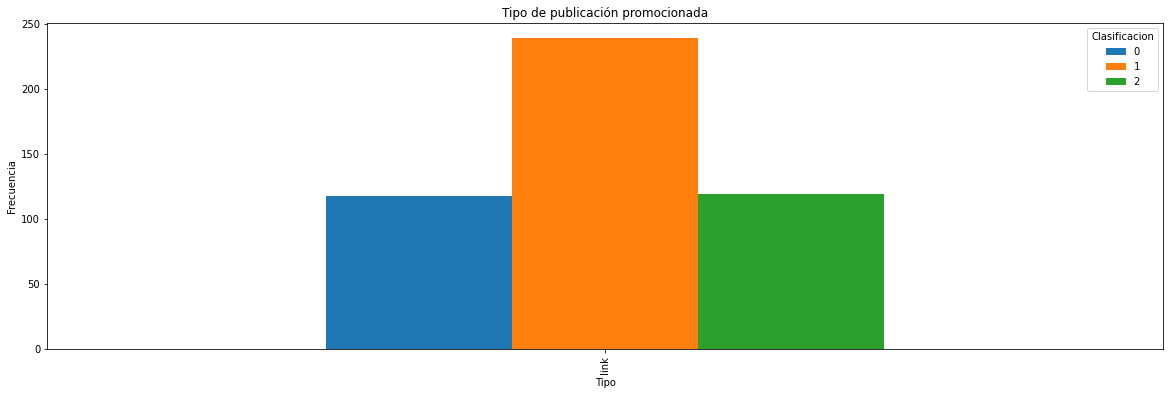

In [31]:
pd.crosstab(data["Promoted post type"],data["Clasificacion"]).plot(kind="bar",figsize=(20,6))
plt.title('Tipo de publicación promocionada')
plt.xlabel('Tipo')
plt.ylabel('Frecuencia')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

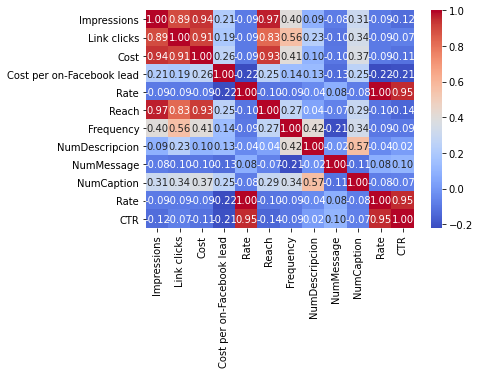

In [ ]:
numerical_columns = ["Impressions","Link clicks","Cost","Cost per on-Facebook lead","Rate","Reach","Frequency","NumDescripcion","NumMessage","NumCaption","Rate","CTR"]
g=sns.heatmap(data[numerical_columns].corr(),annot=True ,fmt=".2f", cmap="coolwarm")

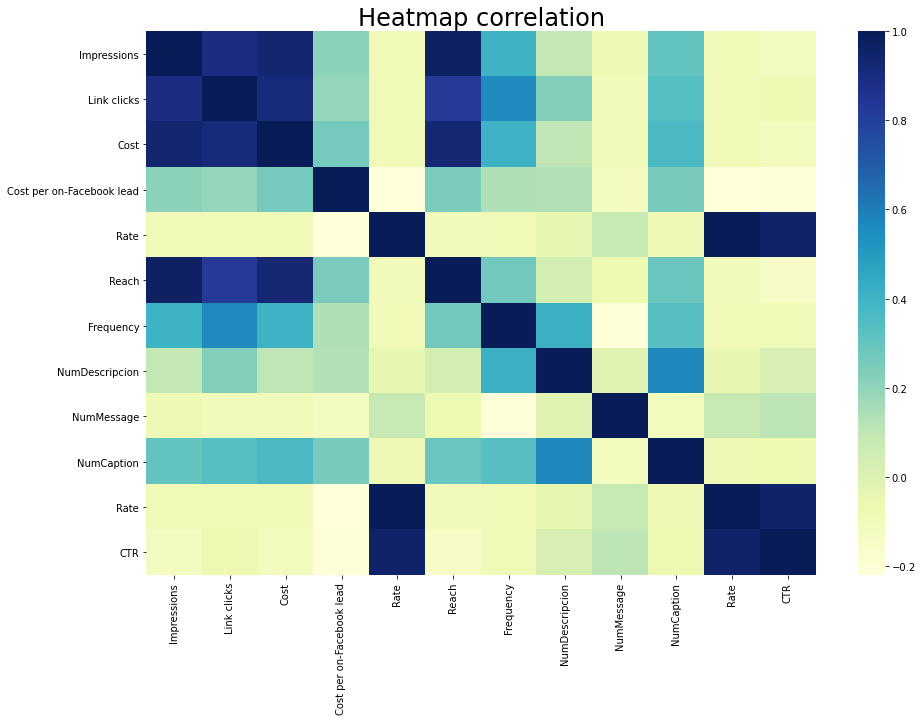

In [ ]:
import seaborn

df_corr = data[numerical_columns].corr() # Calculation of the correlation coefficients in pairs, with the default method:
plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu") 
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

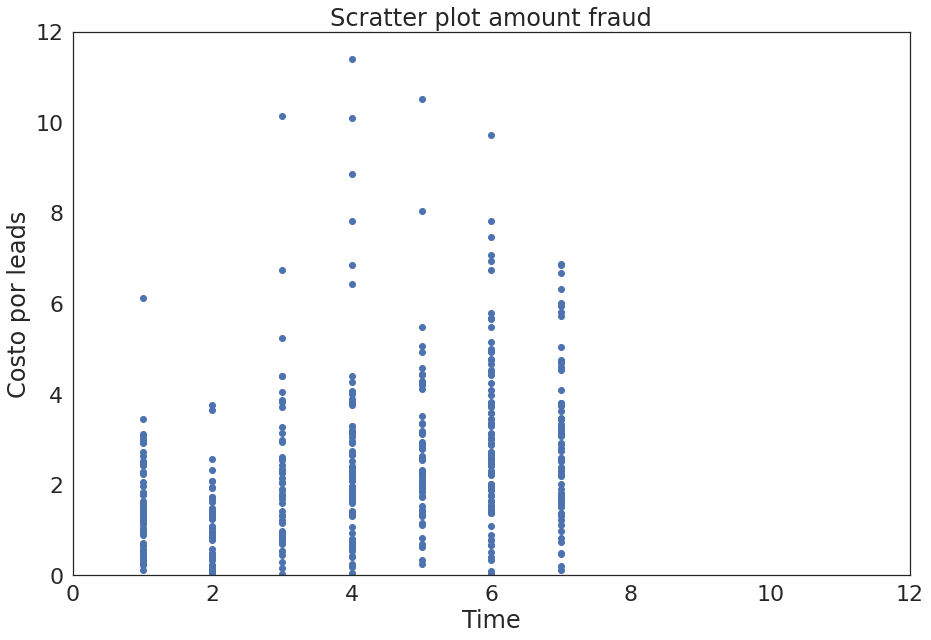

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(data['Month'], data['Cost per on-Facebook lead']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Costo por leads')
plt.xlim([0,12])
plt.ylim([0,12])
plt.show()

In [ ]:
dibujar_box_plot(data, 'Cost per on-Facebook lead', 'Age', 'v')

In [ ]:
dibujar_box_plot(data, 'Cost per on-Facebook lead', 'Gender', 'v')

# 2.- Seleccion de variables, data entrenamiento y test


In [ ]:
df= data[["Month", "NumDescripcion","NumMessage","NumCaption","Targeting minimum age","Targeting maximum age","Age","Gender","Cost","Impressions","Reach","Link clicks","Unique leads","Cost per on-Facebook lead","Rate","CTR","Clasificacion"]]

Creating Dummy Variables¶


In [ ]:
a = pd.get_dummies(data['Gender'], prefix = "type")
b = pd.get_dummies(data['Age'], prefix = "type")

frames = [df,a,b]
df = pd.concat(frames, axis = 1)
df.head()
df = df.drop(columns = ['Gender','Age'])
df.head()

,Month,NumDescripcion,NumMessage,NumCaption,Targeting minimum age,Targeting maximum age,Cost,Impressions,Reach,Link clicks,Unique leads,Cost per on-Facebook lead,Rate,CTR,Clasificacion,type_female,type_male,type_18-24,type_25-34,type_35-44,type_45-54,type_55-64,type_65+
3,1,2,25,6,23,44,0.32,226,193,3,1,0.32,0.005181,0.013274,2,0,1,0,1,0,0,0,0
13,1,2,48,2,23,44,4.60,4608,2525,14,3,1.53,0.001188,0.003038,1,0,1,1,0,0,0,0,0
15,1,2,48,2,23,44,3.67,1749,1172,4,2,1.84,0.001706,0.002287,1,1,0,0,1,0,0,0,0
16,1,2,48,2,23,44,21.01,15951,9362,73,8,2.63,0.000855,0.004577,1,0,1,0,1,0,0,0,0
18,1,2,48,2,23,44,1.94,795,516,10,3,0.65,0.005814,0.012579,2,1,0,0,0,1,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 3 to 3023
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Month                      476 non-null    int64  
 1   NumDescripcion             476 non-null    int64  
 2   NumMessage                 476 non-null    int64  
 3   NumCaption                 476 non-null    int64  
 4   Targeting minimum age      476 non-null    int64  
 5   Targeting maximum age      476 non-null    int64  
 6   Cost                       476 non-null    float64
 7   Impressions                476 non-null    int64  
 8   Reach                      476 non-null    int64  
 9   Link clicks                476 non-null    int64  
 10  Unique leads               476 non-null    int64  
 11  Cost per on-Facebook lead  476 non-null    float64
 12  Rate                       476 non-null    float64
 13  CTR                        476 non-null    float6

Definicion de las variables 

In [ ]:
y = df.Clasificacion.values
x_data = df.drop(['Clasificacion'], axis = 1)

Normalizacion de la data 

In [ ]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values
x


,Month,NumDescripcion,NumMessage,NumCaption,Targeting minimum age,Targeting maximum age,Cost,Impressions,Reach,Link clicks,Unique leads,Cost per on-Facebook lead,Rate,CTR,type_female,type_male,type_18-24,type_25-34,type_35-44,type_45-54,type_55-64,type_65+
3,0.0,0.090909,0.436364,0.625,0.714286,0.0,0.001396,0.001501,0.002819,0.003883,0.000000,0.026385,0.014858,0.048770,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
13,0.0,0.090909,0.854545,0.125,0.714286,0.0,0.021306,0.031121,0.037421,0.025243,0.029851,0.132806,0.002869,0.007639,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.090909,0.854545,0.125,0.714286,0.0,0.016980,0.011795,0.017346,0.005825,0.014925,0.160070,0.004426,0.004620,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
16,0.0,0.090909,0.854545,0.125,0.714286,0.0,0.097646,0.107794,0.138868,0.139806,0.104478,0.229551,0.001868,0.013820,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
18,0.0,0.090909,0.854545,0.125,0.714286,0.0,0.008932,0.005347,0.007612,0.017476,0.029851,0.055409,0.016757,0.045975,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,1.0,0.545455,0.545455,1.000,1.000000,1.0,0.048055,0.046843,0.082736,0.046602,0.029851,0.301671,0.000917,0.009918,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2965,1.0,0.545455,0.545455,1.000,1.000000,1.0,0.022051,0.018933,0.035285,0.031068,0.014925,0.207564,0.001824,0.019784,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2968,1.0,0.545455,0.545455,1.000,1.000000,1.0,0.014561,0.009903,0.017301,0.029126,0.014925,0.137203,0.004439,0.039196,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3019,1.0,0.181818,0.745455,0.375,1.000000,1.0,0.000419,0.000466,0.000905,0.000000,0.000000,0.007916,0.046210,0.050475,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Data entrenamiento y de test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 380 entries, 1351 to 1280
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Month                      380 non-null    float64
 1   NumDescripcion             380 non-null    float64
 2   NumMessage                 380 non-null    float64
 3   NumCaption                 380 non-null    float64
 4   Targeting minimum age      380 non-null    float64
 5   Targeting maximum age      380 non-null    float64
 6   Cost                       380 non-null    float64
 7   Impressions                380 non-null    float64
 8   Reach                      380 non-null    float64
 9   Link clicks                380 non-null    float64
 10  Unique leads               380 non-null    float64
 11  Cost per on-Facebook lead  380 non-null    float64
 12  Rate                       380 non-null    float64
 13  CTR                        380 non-null    flo

# 3.- Creacion de modelos


## 3.0.-pycaret

In [ ]:
pycaret: (Tania)

https://www.kaggle.com/niklasdonges/end-to-end-project-with-python
https://github.com/see-ecuador/MLProductivo/blob/main/diabetes.ipynb

## 3.1.- Regresion Logistica


Modelo

In [ ]:
# get modelo
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 73.96%


In [ ]:
# get importance
importance = lr.coef_[0]

# summarize feature importance
# df_imp = pd.DataFrame({'feature':list(x_train.columns), 'importance':importance})
# display(df_imp.sort_values('importance', ascending=False).head(20))

In [ ]:
# plot feature importance
# plt.figure(figsize = (13,5))
# plt.bar(list(x_train.columns), importance)
# plt.xticks(rotation = 90)
#plt.ylim((0,10)
#plt.show()

In [ ]:
#metrics.accuracy_score(y_train, enet_tuned.predict(X_train_cp))
#lr.score(x_test.T,y_test.T)

In [ ]:
#print( classification_report(y_train, reglog.predict(X_train_cp)) )

Graficar los features importantes

Plot of a ROC

In [ ]:
#lr.feature_importances
#https://machinelearningmastery.com/calculate-feature-importance-with-python/
#https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html


## 3.2.- Elastic Net

In [ ]:
accuracies = {}
enet = LogisticRegression(penalty= 'elasticnet', solver= 'saga', max_iter=500,l1_ratio=0.1)
enet.fit(x_train, y_train)
acc = enet.score(x_test,y_test)*100
accuracies['enet'] = acc
print("Test Accuracy of Elastic net Algorithm: {:.2f}%".format(acc))

Test Accuracy of Elastic net Algorithm: 75.00%


In [ ]:
# get importance
importance = enet.coef_[0]

# summarize feature importance
df_imp = pd.DataFrame({'feature':list(x_train.columns), 'importance':importance})
display(df_imp.sort_values('importance', ascending=False).head(20))

,feature,importance
11,Cost per on-Facebook lead,6.587250
6,Cost,1.126956
8,Reach,0.952138
0,Month,0.916316
7,Impressions,0.759513
1,NumDescripcion,0.668065
9,Link clicks,0.509417
18,type_35-44,0.281768
5,Targeting maximum age,0.148895
4,Targeting minimum age,0.103533


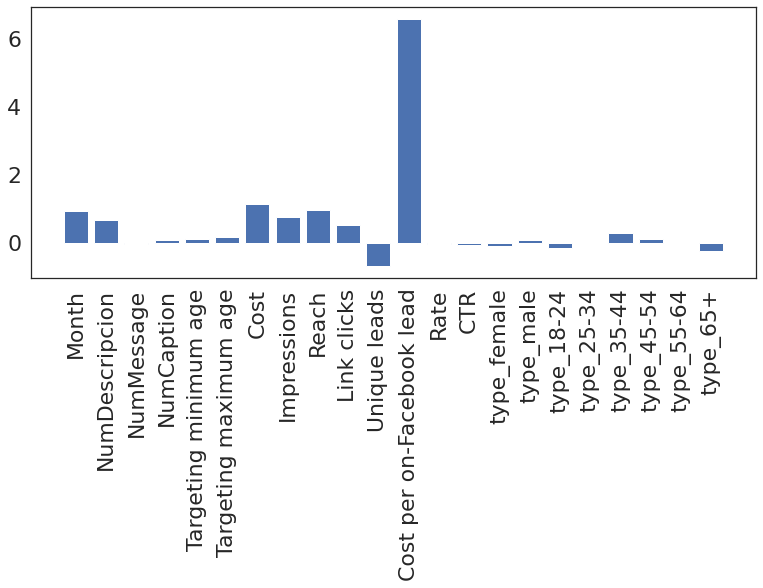

In [ ]:
# plot feature importance
plt.figure(figsize = (13,5))
plt.bar(list(x_train.columns), importance)
plt.xticks(rotation = 90)
#plt.ylim((0,10)
plt.show()

## 3.3.- Support Vector Machine (SVM) Algorithm


In [ ]:
from sklearn.svm import SVC

In [ ]:
x_train.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22 entries, Month to type_65+
Columns: 380 entries, 1351 to 1280
dtypes: float64(380)
memory usage: 66.1+ KB


In [ ]:
accuracies = {}
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

acc = svm.score(x_test,y_test)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 61.46%


In [ ]:
type(svm)

sklearn.svm._classes.SVC

Plot of a ROC

## 3.4- KNN

In [ ]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test, y_test)*100))

2 NN Score: 48.96%


In [ ]:
# try ro find best k value
#  scoreList = []
#  for i in range(1,20):
#   knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
#  knn2.fit(x_train, y_train)
#   scoreList.append(knn2.score(x_test, y_test))
    
#  plt.plot(range(1,20), scoreList)
#  plt.xticks(np.arange(1,20,1))
# plt.xlabel("K value")
#  plt.ylabel("Score")
# plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

**texto en negrita**# 4.- Naive Bayes Algorithm

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

acc = nb.score(x_test,y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 83.33%


## 3.5.- Decision Tree Algorithm



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

acc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 100.00%


### Gini

In [ ]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(x_train, y_train)
acc = clf_gini.score(x_test, y_test)*100
accuracies['Decision Tree gini'] = acc
print("Decision Tree Gini Test Accuracy {:.2f}%".format(acc))

#Compare the train-set and test-set accuracy

y_pred_gini = clf_gini.predict(x_test)
y_pred_train_gini = clf_gini.predict(x_train)
y_pred_train_gini

#Check for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))


Decision Tree Gini Test Accuracy 100.00%
Training set score: 1.0000
Test set score: 1.0000


[Text(133.92000000000002, 181.2, 'X[11] <= 0.11\ngini = 0.626\nsamples = 380\nvalue = [92, 189, 99]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 99\nvalue = [0, 0, 99]'),
 Text(200.88000000000002, 108.72, 'X[11] <= 0.271\ngini = 0.44\nsamples = 281\nvalue = [92, 189, 0]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 189\nvalue = [0, 189, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 92\nvalue = [92, 0, 0]')]

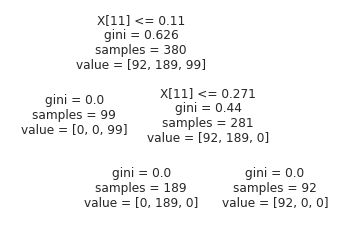

In [ ]:
# Visualize decision-trees


from sklearn import tree

tree.plot_tree(clf_gini.fit(x_train, y_train)) 

### Entropy

In [ ]:

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(x_train, y_train)

#Predict the Test set results with criterion entropy
y_pred_en = clf_en.predict(x_test)

#Check accuracy score with criterion entropy
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

y_pred_train_en = clf_en.predict(x_train)

y_pred_train_en
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

#Check for overfitting and underfitting

print('Training set score: {:.4f}'.format(clf_en.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(x_test, y_test)))

Model accuracy score with criterion entropy: 1.0000
Training-set accuracy score: 1.0000
Training set score: 1.0000
Test set score: 1.0000


[Text(267.84000000000003, 362.4, 'X[11] <= 0.11\nentropy = 1.502\nsamples = 380\nvalue = [92, 189, 99]'),
 Text(133.92000000000002, 217.44, 'entropy = 0.0\nsamples = 99\nvalue = [0, 0, 99]'),
 Text(401.76000000000005, 217.44, 'X[11] <= 0.271\nentropy = 0.912\nsamples = 281\nvalue = [92, 189, 0]'),
 Text(267.84000000000003, 72.47999999999996, 'entropy = 0.0\nsamples = 189\nvalue = [0, 189, 0]'),
 Text(535.6800000000001, 72.47999999999996, 'entropy = 0.0\nsamples = 92\nvalue = [92, 0, 0]')]

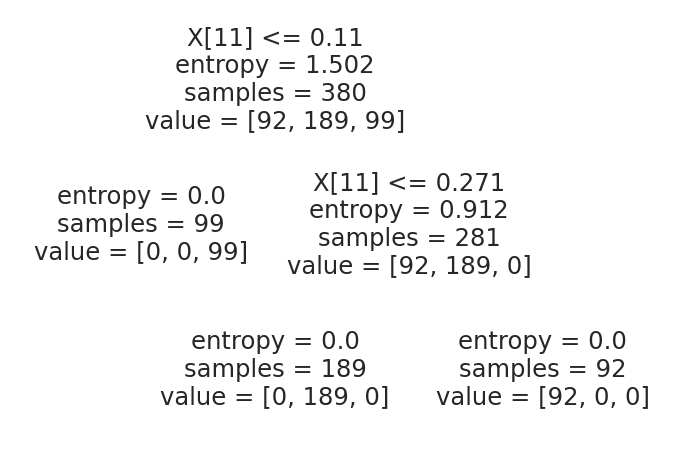

In [ ]:
#Visualize decision-trees

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(x_train, y_train)) 

Bibliografia
https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial

## 3.6.-Random Forest Classification

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [ ]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)

acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 98.96%


## 3.7.-Keras

In [ ]:
import tensorflow as tf
def build_model():
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=[len(x_train.keys())]),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

neural_model = build_model()


In [ ]:
neural_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 184       
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Keeping EPOCHs high as dataset is small.
EPOCHS = 100
neural_pred = neural_model.fit(x_train, y_train,epochs=EPOCHS, validation_split=0.1, verbose=2)

Epoch 1/100
11/11 - 1s - loss: 0.6827 - accuracy: 0.4123 - val_loss: 0.6316 - val_accuracy: 0.5000
Epoch 2/100
11/11 - 0s - loss: 0.6167 - accuracy: 0.4971 - val_loss: 0.5732 - val_accuracy: 0.5000
Epoch 3/100
11/11 - 0s - loss: 0.5676 - accuracy: 0.4971 - val_loss: 0.5203 - val_accuracy: 0.5000
Epoch 4/100
11/11 - 0s - loss: 0.5218 - accuracy: 0.4971 - val_loss: 0.4724 - val_accuracy: 0.5000
Epoch 5/100
11/11 - 0s - loss: 0.4818 - accuracy: 0.4971 - val_loss: 0.4273 - val_accuracy: 0.5000
Epoch 6/100
11/11 - 0s - loss: 0.4452 - accuracy: 0.4971 - val_loss: 0.3857 - val_accuracy: 0.5000
Epoch 7/100
11/11 - 0s - loss: 0.4133 - accuracy: 0.4971 - val_loss: 0.3458 - val_accuracy: 0.5000
Epoch 8/100
11/11 - 0s - loss: 0.3811 - accuracy: 0.4971 - val_loss: 0.3113 - val_accuracy: 0.5000
Epoch 9/100
11/11 - 0s - loss: 0.3538 - accuracy: 0.4971 - val_loss: 0.2791 - val_accuracy: 0.5000
Epoch 10/100
11/11 - 0s - loss: 0.3275 - accuracy: 0.4971 - val_loss: 0.2502 - val_accuracy: 0.5000
Epoch 11/

In [ ]:
_, acc = neural_model.evaluate(x_test, y_test,
                            batch_size=64)
acc = acc *100
accuracies['Keras'] = acc
print("Keras Algorithm Accuracy Score : {:.2f}%".format(acc))

2/2 [==============================] - 0s 6ms/step - loss: 0.2703 - accuracy: 0.5208
Keras Algorithm Accuracy Score : 52.08%


Plot of a ROC

# 7.- Comparacion de modelos y eleccion del mejor

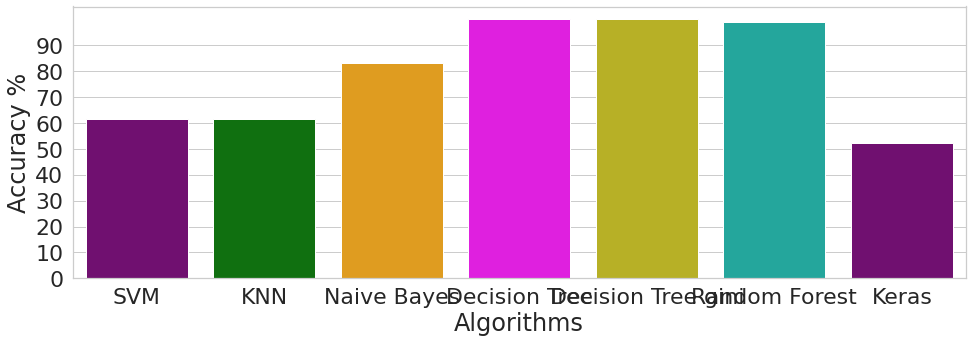

In [ ]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

8.- Matrix de confusion 

In [ ]:
# Predicted values
y_head_lr = lr.predict(x_test)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train, y_train)
y_head_knn = knn3.predict(x_test)
y_head_svm = svm.predict(x_test)
y_head_nb = nb.predict(x_test)
y_head_dtc = dtc.predict(x_test)
y_head_rf = rf.predict(x_test)


In [ ]:
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_nb = confusion_matrix(y_test,y_head_nb)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)


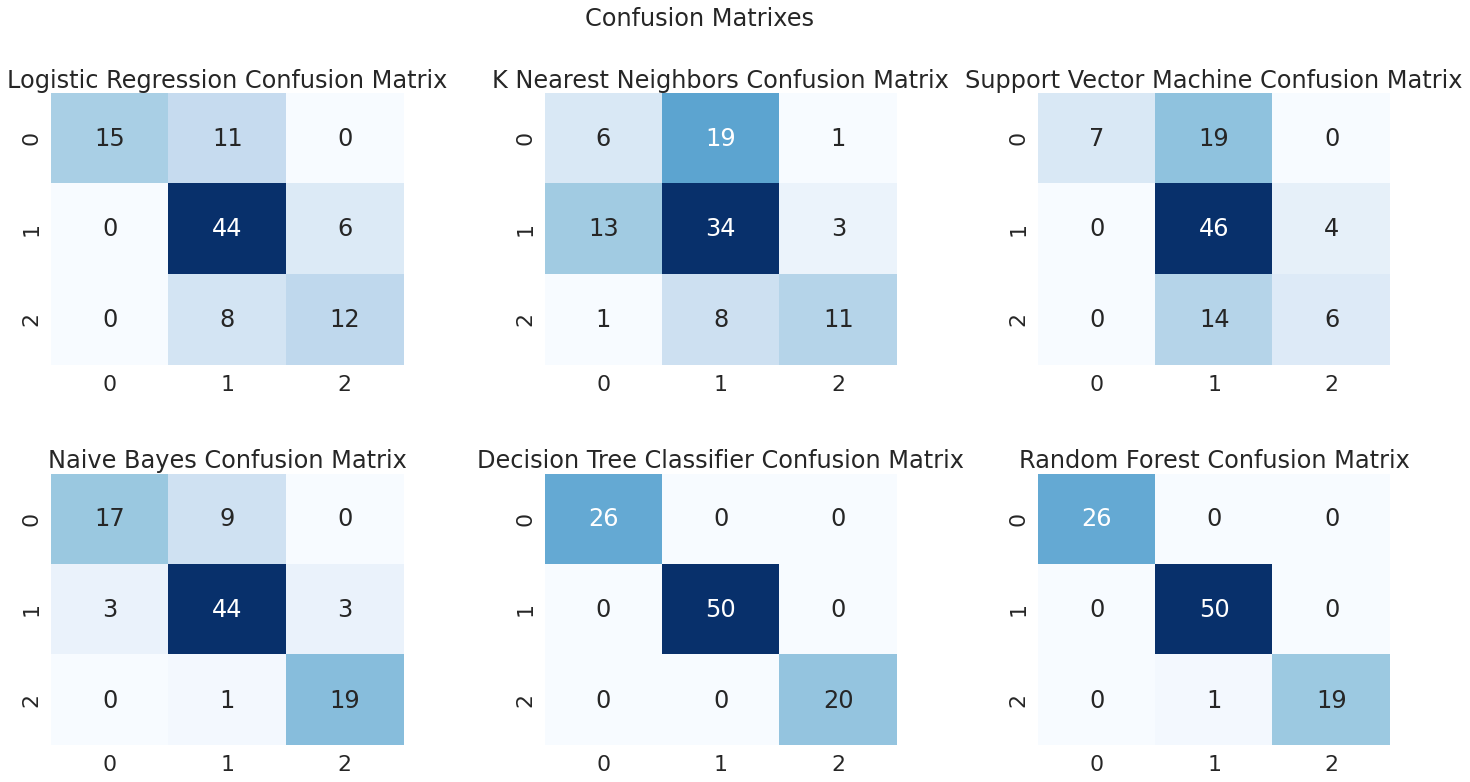

In [ ]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.show()

# 9.- Mejor modelo (Randon Forest)


## K Fold Cross Validation (Randon Forest)

https://www.kaggle.com/niklasdonges/end-to-end-project-with-python

In [ ]:
from sklearn.model_selection import cross_val_score
rf_model = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf_model, x_train, y_train, cv=10, scoring = "accuracy")

In [ ]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [1.         0.97368421 0.97368421 0.92105263 0.97368421 0.94736842
 1.         1.         0.97368421 1.        ]
Mean: 0.9763157894736842
Standard Deviation: 0.024826266136991074


## Feature Importance (Randon Forest)


https://christophm.github.io/interpretable-ml-book/feature-importance.html

In [ ]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [ ]:
importances.head(20)

,importance
feature,
Cost per on-Facebook lead,0.446
Cost,0.119
Rate,0.103
Reach,0.077
Impressions,0.070
Link clicks,0.042
Unique leads,0.029
CTR,0.027
Month,0.022


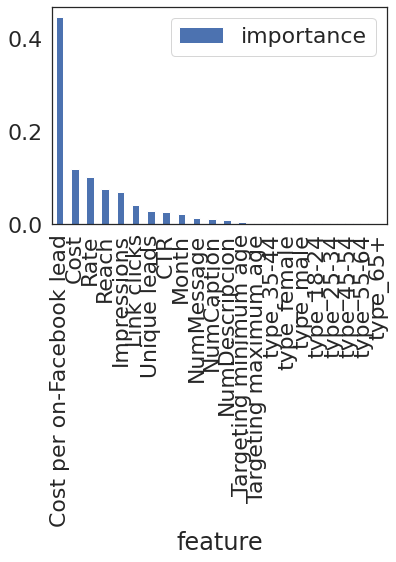

In [ ]:
importances.plot.bar()

In [ ]:
variables= ['Cost per on-Facebook lead','Targeting minimum age', 'Targeting maximum age', 'type_female', 'type_male', 'type_18-24', 'type_25-34',
       'type_35-44', 'type_45-54', 'type_55-64', 'type_65+']
x_train_t = x_train.drop(variables, axis=1)
x_test_t= x_test.drop(variables, axis=1)


In [ ]:
# Training random forest again:

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(x_train_t, y_train)
Y_prediction = random_forest.predict(x_test_t)


random_forest.score(x_train_t, y_train)


acc_random_forest = round(random_forest.score(x_train_t, y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")


100.0 %


In [ ]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 98.95 %


## Hyperparameter Tuning

In [ ]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(x_train_t, y_train)
Y_prediction = random_forest.predict(x_test_t)

random_forest.score(x_train_t, y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 98.16 %


## Further Evaluation

In [ ]:
#Confusion Matrix:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, x_train_t, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[ 90,   2,   0],
       [  0, 187,   2],
       [  0,   3,  96]])

In [ ]:
predictions 

In [ ]:
#Precision and Recal
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions,average=None))
print("Recall:",recall_score(y_train, predictions, average=None))

Precision: [1.         0.97395833 0.97959184]
Recall: [0.97826087 0.98941799 0.96969697]


In [ ]:
# F-Score
from sklearn.metrics import f1_score
f1_score(y_train, predictions, average=None)

array([0.98360656, 0.97894737, 0.97461929])

In [ ]:
#Precision Recall Curv
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(x_train_t)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)